In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np


%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## DATA EXPLORATION

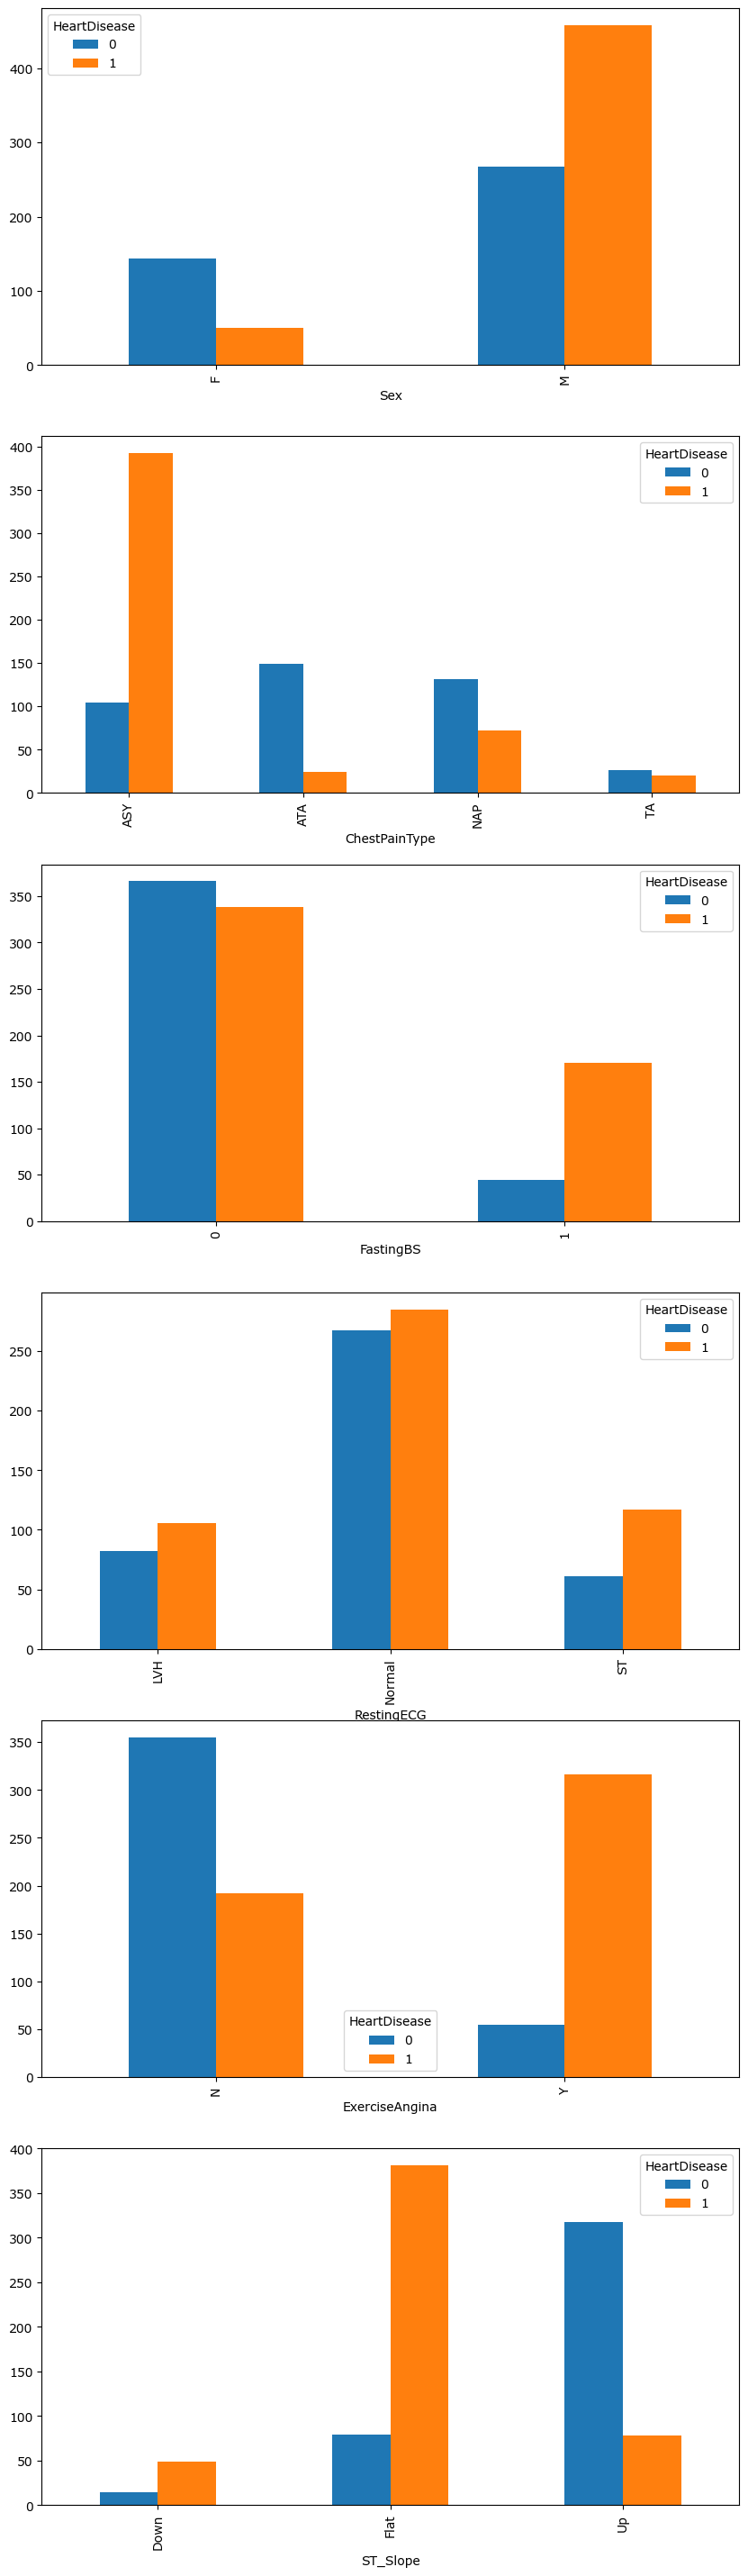

In [6]:


categorical_varaible=['Sex','ChestPainType', 'FastingBS','RestingECG','ExerciseAngina','ST_Slope']

fig, axes = plt.subplots(len(categorical_varaible), 1, figsize =(10, 6*len(categorical_varaible)))


for i, var in enumerate(categorical_varaible):

    crosstab_df = pd.crosstab(data[var], data['HeartDisease'])

    ax = axes[i] if len(categorical_varaible)>1 else axes

    crosstab_df.plot(kind="bar", ax=ax)



Most people tahat fasted had a likelihood of getting heart disease, which shows it is an important varaible

Most ASY, and ATA type of chestpain led to heart disease, and few people had the TA chestppain type. This is a core feature as it shows the pain type has a large play in getting heart disease or not

This shows no matter the type of restingECG you have, you still have a likelihood of having or not having heart disease. I want to remove this, but it seems people with ST, is likely to have heart disease. I am not usig this 

People with exercise angina, has more probability to have disease. This is very necessary

people with flat slope has more probability of having heart disease, andalso people with Up has less probability to have heart disease. This shows it is very importants

This shows males are more at risk in getting heart disease, making it a necessary feature. They tested mostly males

In [7]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


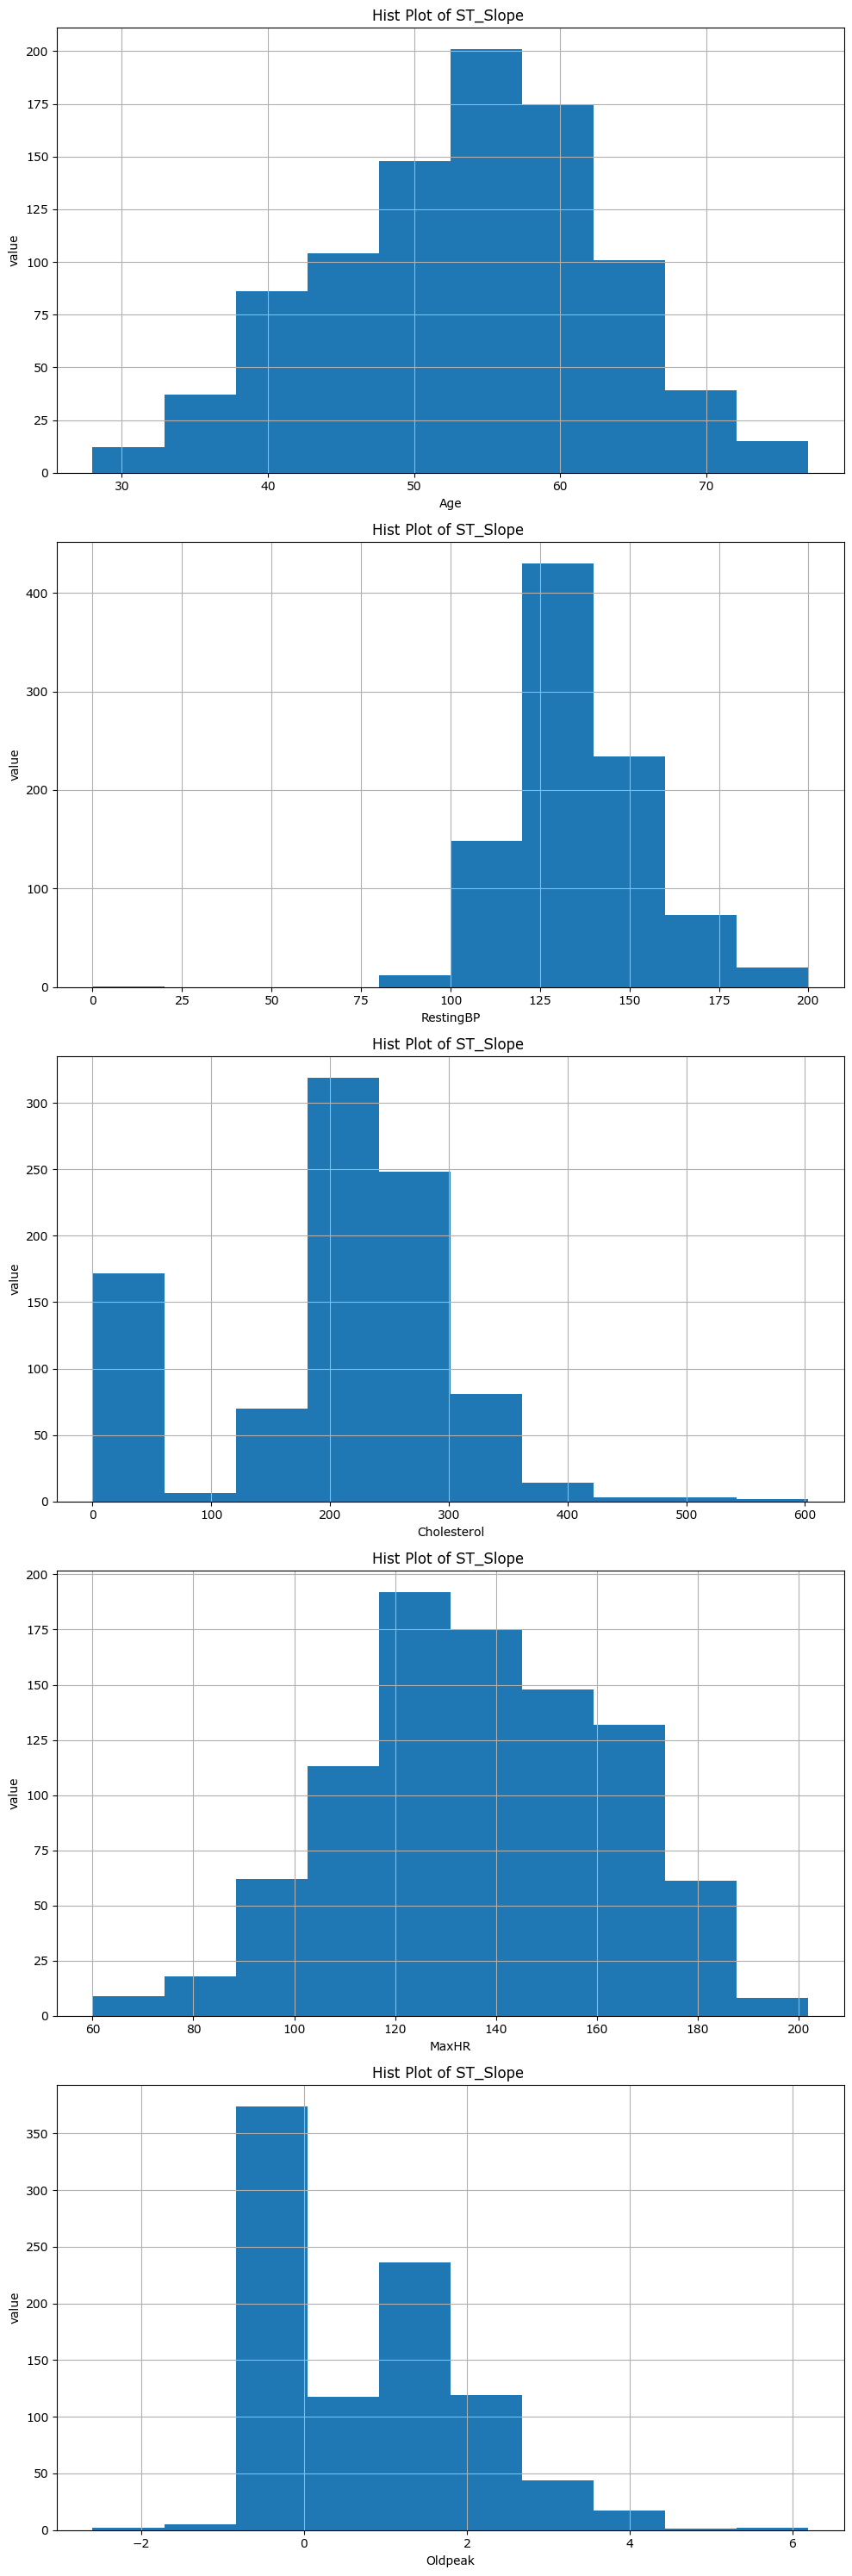

In [8]:
numerical_varaible =['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

fig, axes = plt.subplots(len(numerical_varaible), 1, figsize =(10, 6*len(numerical_varaible)))

for i, val in enumerate(numerical_varaible):

    ax = axes[i] 
    data[val].hist(ax=ax)

    ax.set_xlabel(val)
    ax.set_ylabel('value')
    ax.set_title(f'Hist Plot of {var} ')


plt.tight_layout()

Age is distibuted well
Everything is quite distibuted in a way, but I will remove oldpeak because rmoving outliers, will reduce it drastically, and I really do not know how to transform it for now

This is distibuited enough
numerical_varaible =['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

In [9]:
data.groupby('Oldpeak')['HeartDisease'].agg('count')

Oldpeak
-2.6      1
-2.0      1
-1.5      1
-1.1      1
-1.0      2
-0.9      1
-0.8      1
-0.7      1
-0.5      2
-0.1      2
 0.0    368
 0.1     14
 0.2     22
 0.3     11
 0.4     11
 0.5     19
 0.6     14
 0.7      7
 0.8     16
 0.9      4
 1.0     86
 1.1      7
 1.2     26
 1.3      7
 1.4     18
 1.5     53
 1.6     16
 1.7      6
 1.8     17
 1.9      7
 2.0     76
 2.1      2
 2.2      5
 2.3      2
 2.4      4
 2.5     16
 2.6      7
 2.8      7
 2.9      1
 3.0     28
 3.1      1
 3.2      2
 3.4      3
 3.5      2
 3.6      4
 3.7      1
 3.8      1
 4.0      8
 4.2      2
 4.4      1
 5.0      1
 5.6      1
 6.2      1
Name: HeartDisease, dtype: int64

PREPROCESSING DATA

In [10]:
# Removing unnecessary data

data2 = data.drop(['RestingECG','Oldpeak'],axis = 'columns')


##### removing outliers

In [11]:
#Removing outliers

def remove_outlier(data, column):
    upper_bound = data[column].quantile(0.99)
    lower_bound = data[column].quantile(0.01)

    return data[(data[column] > lower_bound )& (data[column] < upper_bound ) ]

In [12]:
# #Removing outliers

# def remove_outlier(data, column):
#     data[data[column]>(data[column].mean()+3*data[column].std())]
 

#     return data[data[column]>(data[column].mean()+3*data[column].std())]

In [13]:
data3 = remove_outlier(data2, 'Cholesterol')

###### Working on categorical values

In [14]:
categorical_varaible=['Sex','ChestPainType', 'FastingBS','ExerciseAngina','ST_Slope']

In [15]:


for var in categorical_varaible:
    dummy = pd.get_dummies(data3[var], dtype= float)
    data3 = pd.concat([data3, dummy], axis='columns')

In [16]:
data3

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,ST_Slope,HeartDisease,...,ATA,NAP,TA,0,1,N,Y,Down,Flat,Up
0,40,M,ATA,140,289,0,172,N,Up,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,F,NAP,160,180,0,156,N,Flat,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,M,ATA,130,283,0,98,N,Up,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,48,F,ASY,138,214,0,108,Y,Flat,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,M,NAP,150,195,0,122,N,Up,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,132,N,Flat,1,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,M,ASY,144,193,1,141,N,Flat,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
915,57,M,ASY,130,131,0,115,Y,Flat,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,F,ATA,130,236,0,174,N,Flat,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
data3.drop(categorical_varaible, axis='columns', inplace = True)

In [18]:
data3

,Age,RestingBP,Cholesterol,MaxHR,HeartDisease,F,M,ASY,ATA,NAP,TA,0,1,N,Y,Down,Flat,Up
0,40,140,289,172,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,156,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,98,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,108,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,122,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,141,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,115,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,174,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


#### just a quick processing

In [19]:
data3["0"] = data3[0]
data3["1"] = data3[1]

data3.drop([0,1],axis='columns', inplace = True)

#### Scaling the feature

In [20]:
features = data3.drop(['HeartDisease'], axis = 'columns')
target = data3['HeartDisease']

In [21]:
features

,Age,RestingBP,Cholesterol,MaxHR,F,M,ASY,ATA,NAP,TA,N,Y,Down,Flat,Up,0,1
0,40,140,289,172,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,49,160,180,156,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,130,283,98,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,48,138,214,108,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,122,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
914,68,144,193,141,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
915,57,130,131,115,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,174,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [22]:
from sklearn.preprocessing import StandardScaler
d_columns = list(features.columns)
scaler = StandardScaler()
features = scaler.fit_transform(features)



In [23]:
features = pd.DataFrame(features, columns=d_columns)

In [24]:
type(features)

pandas.core.frame.DataFrame

In [25]:
features

,Age,RestingBP,Cholesterol,MaxHR,F,M,ASY,ATA,NAP,TA,N,Y,Down,Flat,Up,0,1
0,-1.361139,0.400202,0.927437,1.295919,-0.56689,0.56689,-0.989189,1.860270,-0.539656,-0.242884,0.794940,-0.794940,-0.246006,-0.947052,1.061682,0.443563,-0.443563
1,-0.412067,1.554616,-1.190368,0.642018,1.76401,-1.76401,-0.989189,-0.537556,1.853034,-0.242884,0.794940,-0.794940,-0.246006,1.055908,-0.941902,0.443563,-0.443563
2,-1.677497,-0.177005,0.810861,-1.728374,-0.56689,0.56689,-0.989189,1.860270,-0.539656,-0.242884,0.794940,-0.794940,-0.246006,-0.947052,1.061682,0.443563,-0.443563
3,-0.517519,0.284761,-0.529768,-1.319685,1.76401,-1.76401,1.010929,-0.537556,-0.539656,-0.242884,-1.257957,1.257957,-0.246006,1.055908,-0.941902,0.443563,-0.443563
4,0.115195,0.977409,-0.898927,-0.747522,-0.56689,0.56689,-0.989189,-0.537556,1.853034,-0.242884,0.794940,-0.794940,-0.246006,-0.947052,1.061682,0.443563,-0.443563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,-0.833877,-1.331419,0.441702,-0.338834,-0.56689,0.56689,-0.989189,-0.537556,-0.539656,4.117186,0.794940,-0.794940,-0.246006,1.055908,-0.941902,0.443563,-0.443563
732,1.591530,0.631085,-0.937786,0.028986,-0.56689,0.56689,1.010929,-0.537556,-0.539656,-0.242884,0.794940,-0.794940,-0.246006,1.055908,-0.941902,-2.254472,2.254472
733,0.431553,-0.177005,-2.142409,-1.033604,-0.56689,0.56689,1.010929,-0.537556,-0.539656,-0.242884,-1.257957,1.257957,-0.246006,1.055908,-0.941902,0.443563,-0.443563
734,0.431553,-0.177005,-0.102321,1.377657,1.76401,-1.76401,-0.989189,1.860270,-0.539656,-0.242884,0.794940,-0.794940,-0.246006,1.055908,-0.941902,0.443563,-0.443563


In [26]:
##Let us try using PCA

from sklearn.decomposition import PCA
pca = PCA(0.95)
features2 = pca.fit_transform(features)

In [27]:
pca.n_components_

11

In [28]:
pca.explained_variance_ratio_

array([0.25559739, 0.12144618, 0.11250094, 0.08101864, 0.07185584,
       0.06694738, 0.05991316, 0.05552224, 0.05309386, 0.04780728,
       0.04361447])

In [29]:
features2

array([[-2.5581658 ,  0.06823932, -1.16406095, ...,  0.0690738 ,
         0.38291169,  0.41146518],
       [-1.27162344, -0.42125892,  2.24785687, ...,  0.94649221,
         0.03783508,  2.20980855],
       [-1.83429029, -0.23590019, -1.24976844, ...,  0.58680225,
         0.4844883 , -0.76380257],
       ...,
       [ 2.49891498, -1.16609797, -1.00860109, ...,  1.17353308,
        -0.9761181 ,  0.44724087],
       [-1.75478164, -0.87332683,  2.25617944, ...,  1.57596565,
         1.13353492,  0.50778946],
       [-2.46239475,  0.44412585, -1.61127557, ..., -0.18784915,
        -0.74287407,  1.27530598]])

In [30]:
target

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 736, dtype: int64

#### Now let us go to the fun part which is creating our model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import  GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

Let us try knn and kmeans first first

In [32]:
kn = KMeans(n_clusters = 2)

In [33]:
kn.fit_predict(features)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [34]:
scores = []

In [35]:
models = {
    'lnr':{
'model': LinearRegression(),
'params': {
   
    'fit_intercept':[True, False]

}
    } ,

'Lor':{
    'model':LogisticRegression(),
    'params':{
        'C': [0.01, 0.1, 1, 10 ],
        'penalty':['l1', 'l2'],
        'solver':['saga','sag', 'lbfgs','liblinear']



    }
}
,

'randomtree':{
    'model':RandomForestClassifier(),
    'params':{
        'n_estimators': [100, 200, 300],
   
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']

    }
},
'SVC':{
    'model':SVC(),
    'params':{
            'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
  
    }

},

'decisiontree':{
    'model':DecisionTreeClassifier(),
    'params':{
        
   
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
  
    }

},



'gnb':{
    'model':GaussianNB(),
    'params':{
          
    }

},


    
}

In [36]:
score =[]
for model, param in models.items():
    print('start1')
    clf = GridSearchCV(param['model'],param['params'], cv = 3, return_train_score=False)
    clf.fit(features, target)

    scores.append(
        {'model_name':model,
         'best_score':clf.best_score_,
         'best_params':clf.best_params_}
    )
    print(f'{model} done')
dataframe = pd.DataFrame(scores, columns= ['model_name', 'best_score', 'best_params'])

start1
lnr done
start1


c:\Users\USER\Documents\CODING\AI.ML\heart_disease_prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\Documents\CODING\AI.ML\heart_disease_prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\Documents\CODING\AI.ML\heart_disease_prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\Documents\CODING\AI.ML\heart_disease_prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\Documents\CODING\AI.ML\heart_disease_prediction\venv\Lib\site-packages\sklearn\model_selection\_validation

Lor done
start1
randomtree done
start1
SVC done
start1
decisiontree done
start1
gnb done


In [37]:
dataframe

,model_name,best_score,best_params
0,lnr,0.461011,{'fit_intercept': True}
1,Lor,0.851839,"{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}"
2,randomtree,0.845036,"{'bootstrap': True, 'criterion': 'entropy', 'm..."
3,SVC,0.838245,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}"
4,decisiontree,0.786610,"{'criterion': 'gini', 'max_features': 'log2'}"
5,gnb,0.835540,{}


In [38]:
model = LogisticRegression(C=0.01, penalty='l2', solver = 'saga')
model.fit(features, target)

LogisticRegression(C=0.01, solver='saga')

In [39]:
cvs = cross_val_score(model, features, target, cv = 3)



In [40]:
cvs

array([0.89837398, 0.88163265, 0.7755102 ])

Visualize and save model

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import pickle

In [42]:
prediction = cross_val_predict(model, features, target, cv=3)

In [43]:
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [44]:
conf = confusion_matrix(target, prediction)

<Axes: >

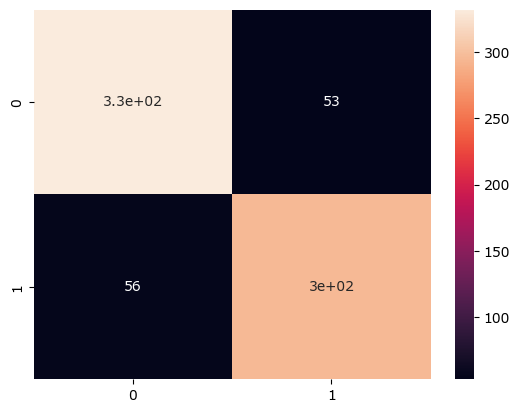

In [45]:
sns.heatmap(conf, annot=True)

In [46]:
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [47]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

Trying predicting

In [48]:
data2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,172,N,Up,0
1,49,F,NAP,160,180,0,156,N,Flat,1
2,37,M,ATA,130,283,0,98,N,Up,0
3,48,F,ASY,138,214,0,108,Y,Flat,1
4,54,M,NAP,150,195,0,122,N,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,132,N,Flat,1
914,68,M,ASY,144,193,1,141,N,Flat,1
915,57,M,ASY,130,131,0,115,Y,Flat,1
916,57,F,ATA,130,236,0,174,N,Flat,1


In [49]:
features

,Age,RestingBP,Cholesterol,MaxHR,F,M,ASY,ATA,NAP,TA,N,Y,Down,Flat,Up,0,1
0,-1.361139,0.400202,0.927437,1.295919,-0.56689,0.56689,-0.989189,1.860270,-0.539656,-0.242884,0.794940,-0.794940,-0.246006,-0.947052,1.061682,0.443563,-0.443563
1,-0.412067,1.554616,-1.190368,0.642018,1.76401,-1.76401,-0.989189,-0.537556,1.853034,-0.242884,0.794940,-0.794940,-0.246006,1.055908,-0.941902,0.443563,-0.443563
2,-1.677497,-0.177005,0.810861,-1.728374,-0.56689,0.56689,-0.989189,1.860270,-0.539656,-0.242884,0.794940,-0.794940,-0.246006,-0.947052,1.061682,0.443563,-0.443563
3,-0.517519,0.284761,-0.529768,-1.319685,1.76401,-1.76401,1.010929,-0.537556,-0.539656,-0.242884,-1.257957,1.257957,-0.246006,1.055908,-0.941902,0.443563,-0.443563
4,0.115195,0.977409,-0.898927,-0.747522,-0.56689,0.56689,-0.989189,-0.537556,1.853034,-0.242884,0.794940,-0.794940,-0.246006,-0.947052,1.061682,0.443563,-0.443563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,-0.833877,-1.331419,0.441702,-0.338834,-0.56689,0.56689,-0.989189,-0.537556,-0.539656,4.117186,0.794940,-0.794940,-0.246006,1.055908,-0.941902,0.443563,-0.443563
732,1.591530,0.631085,-0.937786,0.028986,-0.56689,0.56689,1.010929,-0.537556,-0.539656,-0.242884,0.794940,-0.794940,-0.246006,1.055908,-0.941902,-2.254472,2.254472
733,0.431553,-0.177005,-2.142409,-1.033604,-0.56689,0.56689,1.010929,-0.537556,-0.539656,-0.242884,-1.257957,1.257957,-0.246006,1.055908,-0.941902,0.443563,-0.443563
734,0.431553,-0.177005,-0.102321,1.377657,1.76401,-1.76401,-0.989189,1.860270,-0.539656,-0.242884,0.794940,-0.794940,-0.246006,1.055908,-0.941902,0.443563,-0.443563


In [50]:
features.shape[0]

736

In [51]:
list(features.columns)

['Age',
 'RestingBP',
 'Cholesterol',
 'MaxHR',
 'F',
 'M',
 'ASY',
 'ATA',
 'NAP',
 'TA',
 'N',
 'Y',
 'Down',
 'Flat',
 'Up',
 '0',
 '1']

In [52]:
np.where(features.columns == '0')[0][0]

15

In [53]:
with open('features.pkl','wb') as file:
    pickle.dump(features, file)

In [54]:
def heart_attack(age, restingBp, cholesterol, maxhr, sex, chest_pain_type, exercise_agna, st_slope, fasting_bs):
    pred_test = np.zeros(len(features.columns))

  
    chest_pain_type_index = np.where(features.columns == chest_pain_type)[0][0]
    sex_index = np.where(features.columns == sex)[0][0]
    exercise_agna_index = np.where(features.columns == exercise_agna)[0][0]
    st_slope_index = np.where(features.columns == st_slope)[0][0]
    fasting_bs_index = np.where(features.columns == fasting_bs)[0][0]

    pred_test[0] = age
    pred_test[1] = restingBp
    pred_test[2] = cholesterol
    pred_test[3] = maxhr
    pred_test[sex_index] = 1
    pred_test[chest_pain_type_index] = 1
    pred_test[exercise_agna_index] = 1
    pred_test[st_slope_index] = 1
    pred_test[fasting_bs_index] = 1

 
    

    # Try reshaping and transforming
    scaled_prediction = scaler.transform([pred_test])

    return model.predict(scaled_prediction)


In [55]:
heart_attack(54, 140,289,172, 'F', 'ATA','N','Up','0')

c:\Users\USER\Documents\CODING\AI.ML\heart_disease_prediction\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\Documents\CODING\AI.ML\heart_disease_prediction\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)